<a href="https://colab.research.google.com/github/ylee863/HR-Analytics/blob/main/HR_Analytics_Data_Science_Competition_YLEE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

### Load and Explore Data

In [ ]:
df_hr= pd.read_csv("/content/train_LZdllcl.csv")

In [ ]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
df_hr.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [ ]:
df_hr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
df_hr.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Looks like there are some missing values in education and previous_year_rating. We will deal with this later.

### Generate Visualizations of current data

Let's look at the distribution of promotions.

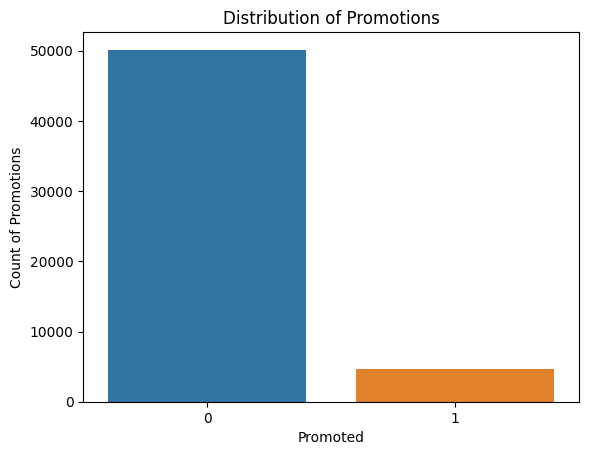

In [ ]:
# generate plot
sns.countplot(x='is_promoted', data=df_hr)
plt.title('Distribution of Promotions')
plt.xlabel('Promoted')
plt.ylabel('Count of Promotions')
plt.show()

In [ ]:
# overall promotion rate, but this can be seen from descriptive stats too..
overall_promotion_rate = df_hr['is_promoted'].mean()
print("Overall Promotion Rate:", overall_promotion_rate)

Overall Promotion Rate: 0.08517004816815063


Let's look at distribution of promotions by gender too.

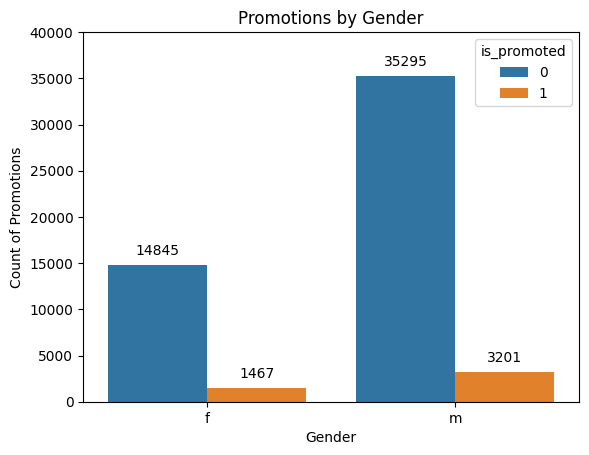

<Figure size 800x600 with 0 Axes>

In [ ]:
ax = sns.countplot(x='gender', hue='is_promoted', data=df_hr)
plt.title('Promotions by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Promotions')

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Adjusting the size of the graph and setting the maximum y-axis limit
plt.ylim(0, 40000)
plt.figure(figsize=(8, 6))

plt.show()

In [ ]:
# Female
promotions_f = 1467/(14845+1467)
print("Female proportion of promotions", promotions_f)

# Male
promotions_m = 3201/(3201+35295)
print("Male proportion of promotions", promotions_m)

Female proportion of promotions 0.08993379107405591
Male proportion of promotions 0.08315149625935161


Actually quite balanced / even by gender.

Let's also look at distribution of promotions by department.

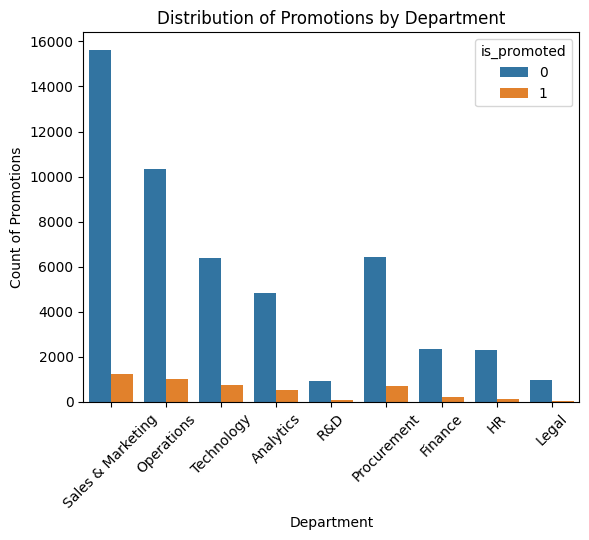

In [ ]:
# generate plot
sns.countplot(x='department',hue='is_promoted', data=df_hr)
plt.title('Distribution of Promotions by Department')
plt.xlabel('Department')
plt.ylabel('Count of Promotions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [ ]:
# by department
promotion_rate = df_hr.groupby('department')['is_promoted'].mean().reset_index()
promotion_rate.columns = ['department', 'promotion_rate']
print(promotion_rate)

          department  promotion_rate
0          Analytics        0.095665
1            Finance        0.081230
2                 HR        0.056245
3              Legal        0.051011
4         Operations        0.090148
5        Procurement        0.096386
6                R&D        0.069069
7  Sales & Marketing        0.072031
8         Technology        0.107593


relatively balanced promotion rate... from 5% to 11%. More opportunities in tech perhaps.

Now what about education level?

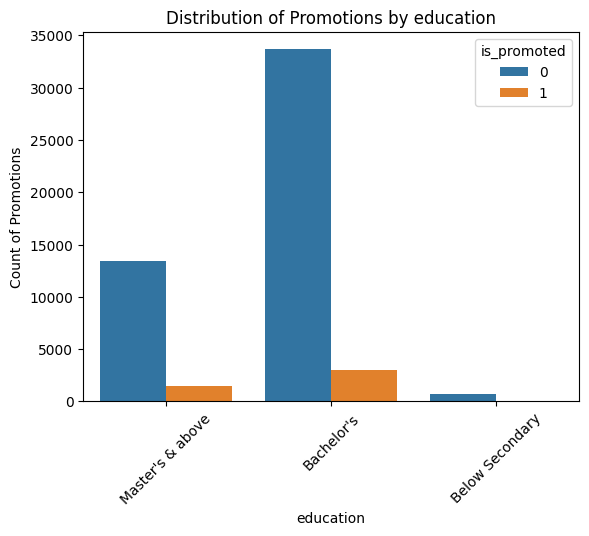

In [ ]:
sns.countplot(x='education',hue='is_promoted', data=df_hr)
plt.title('Distribution of Promotions by education')
plt.xlabel('education')
plt.ylabel('Count of Promotions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()

In [ ]:
# by education level
promotion_rate_per_education = df_hr.groupby('education')['is_promoted'].mean().reset_index()
promotion_rate_per_education.columns = ['education', 'promotion_rate']
print(promotion_rate_per_education)

          education  promotion_rate
0        Bachelor's        0.082031
1   Below Secondary        0.083230
2  Master's & above        0.098559


relatively balanced

Let's look at distributions of features as well.

<ipython-input-19-c5d8a4bbe6ac>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_hr[columns].iloc[:, i], ax=axs[row][col])
<ipython-input-19-c5d8a4bbe6ac>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_hr[columns].iloc[:, i], ax=axs[row][col])
<ipython-input-19-c5d8a4bbe6ac>:7: UserWarni

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

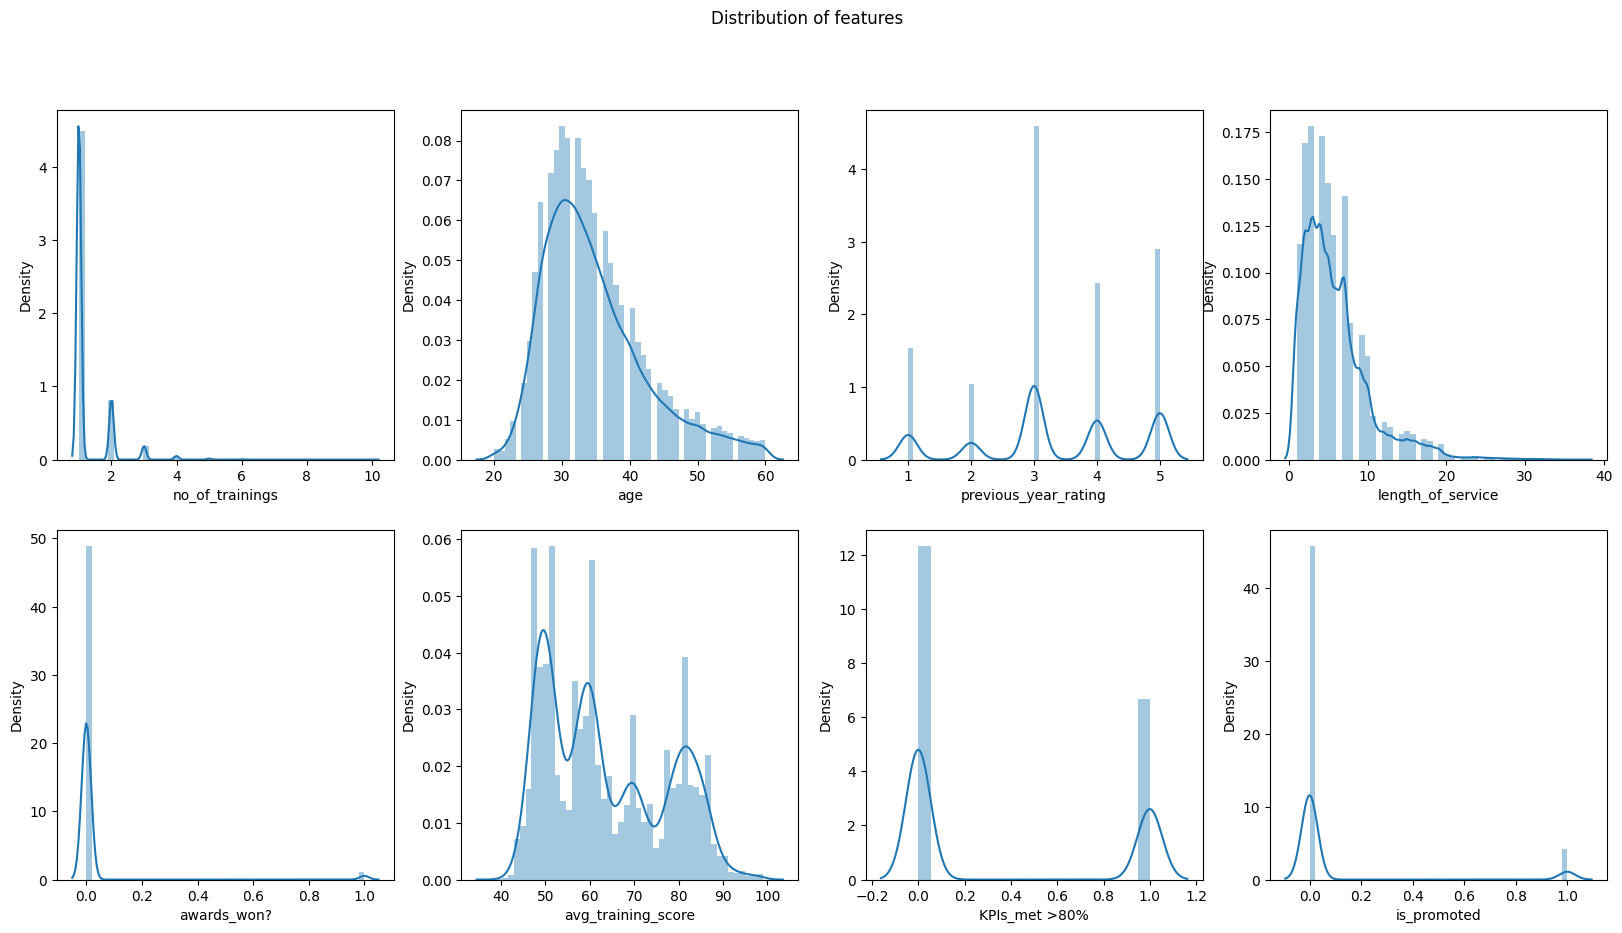

In [ ]:
columns = [ 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won?', 'avg_training_score', 'KPIs_met >80%','is_promoted']
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, feature in enumerate(df_hr[columns]):
    row = int(i/4)
    col = i%4
    sns.distplot(df_hr[columns].iloc[:, i], ax=axs[row][col])

plt.suptitle('Distribution of features')
plt.tight_layout

It looks like age, length of service, KPIs_met, and average training score are skewed distributions. So, I'm going to take the log to help normalize them for our model.

In [ ]:
# take log
age_log = np.log1p(df_hr['age'])
service_log = np.log1p(df_hr['length_of_service'])
score_log = np.log1p(df_hr['avg_training_score'])
KPIS_met_log = np.log1p(df_hr['KPIs_met >80%'])

df_hr.insert(6, 'age_log', age_log)
df_hr.insert(9, 'length_of_service_log', service_log)
df_hr.insert(12, 'avg_training_score_log', score_log)
df_hr.insert(15, 'KPIS_met_log', KPIS_met_log)

df_hr.head()

,employee_id,department,region,education,gender,recruitment_channel,age_log,no_of_trainings,age,length_of_service_log,previous_year_rating,length_of_service,avg_training_score_log,KPIs_met >80%,awards_won?,KPIS_met_log,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,3.583519,1,35,2.197225,5.0,8,3.912023,1,0,0.693147,49,0
1,65141,Operations,region_22,Bachelor's,m,other,3.433987,1,30,1.609438,5.0,4,4.110874,0,0,0.000000,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,3.555348,1,34,2.079442,3.0,7,3.931826,0,0,0.000000,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,3.688879,2,39,2.397895,1.0,10,3.931826,0,0,0.000000,50,0
4,48945,Technology,region_26,Bachelor's,m,other,3.828641,1,45,1.098612,3.0,2,4.304065,0,0,0.000000,73,0


<ipython-input-21-f0af633b7c77>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_hr['age_log'], ax=ax1)
<ipython-input-21-f0af633b7c77>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_hr['length_of_service_log'], ax=ax2)
<ipython-input-21-f0af633b7c77>:9: UserWarning: 

`distplot` is a de

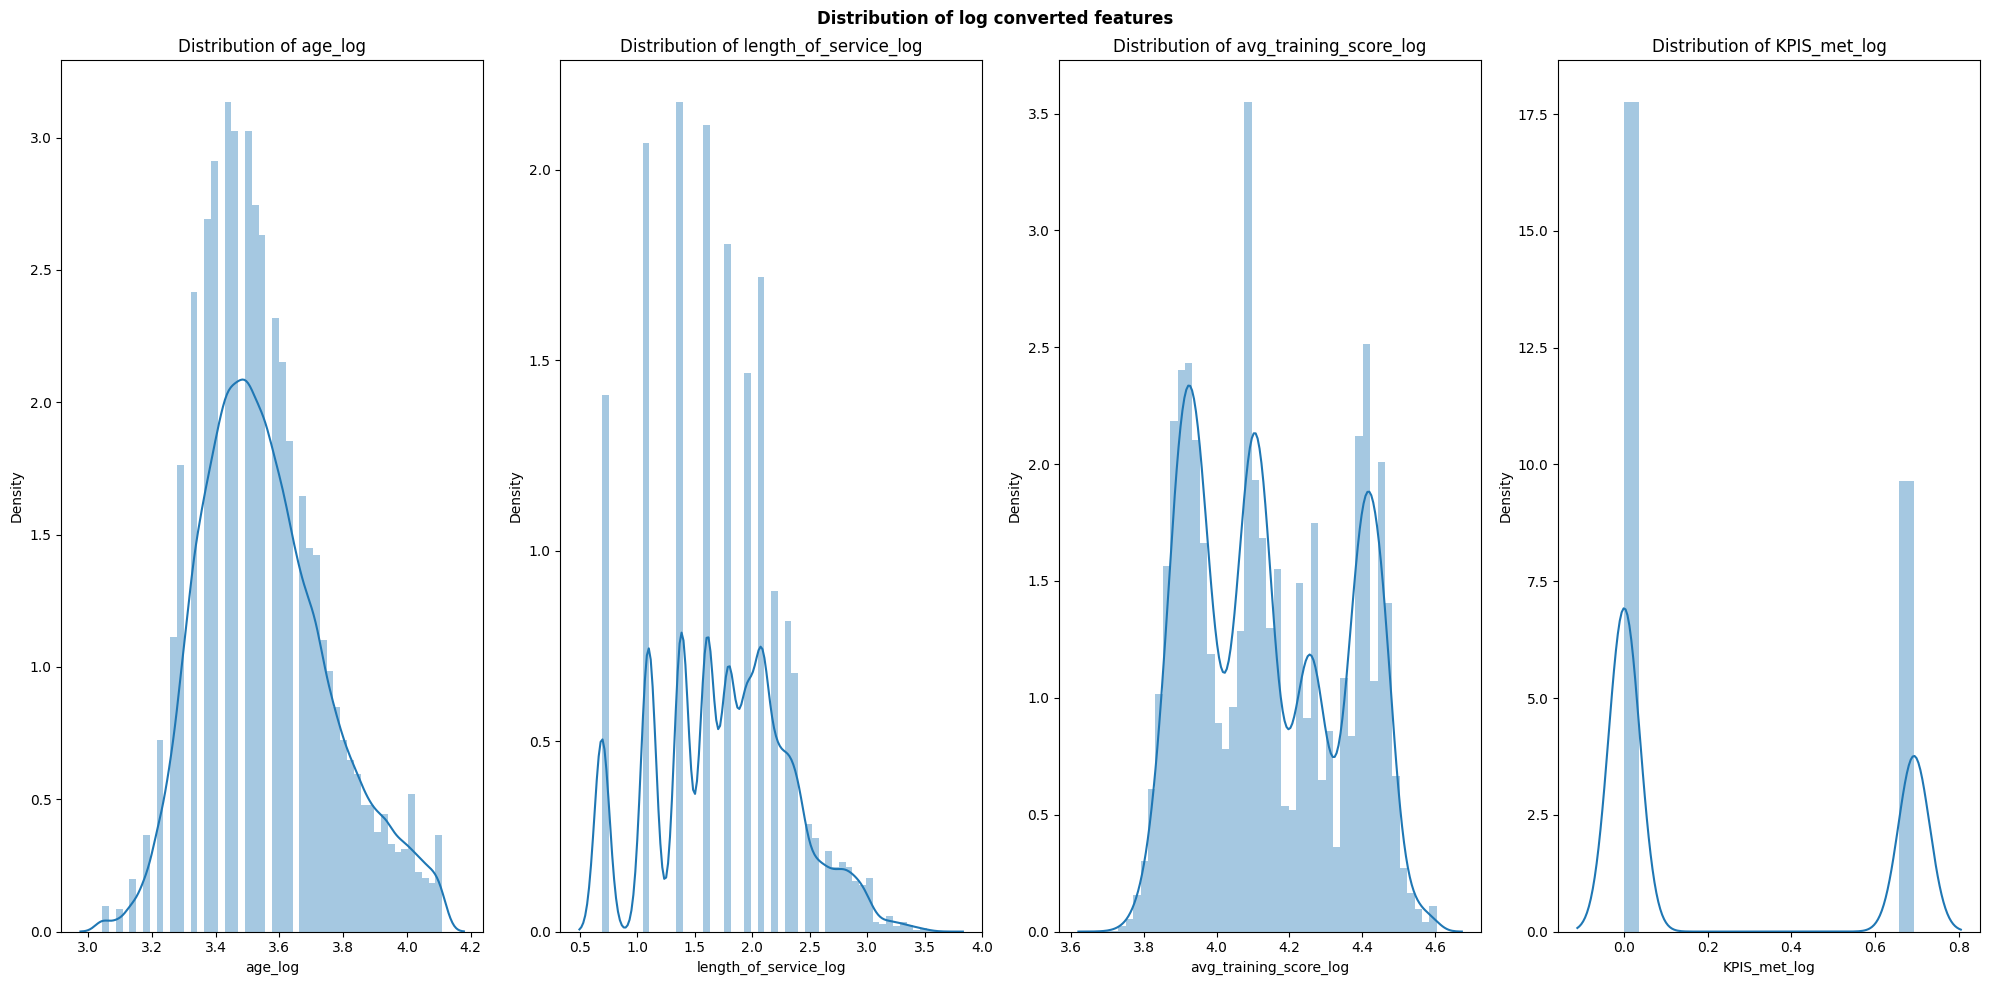

In [ ]:
log_columns = ['age_log', 'length_of_service_log', 'avg_training_score_log']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20, 10))

sns.distplot(df_hr['age_log'], ax=ax1)
ax1.set_title('Distribution of age_log')
sns.distplot(df_hr['length_of_service_log'], ax=ax2)
ax2.set_title('Distribution of length_of_service_log')
sns.distplot(df_hr['avg_training_score_log'], ax=ax3)
ax3.set_title('Distribution of avg_training_score_log')
sns.distplot(df_hr['KPIS_met_log'], ax=ax4)
ax4.set_title('Distribution of KPIS_met_log')

plt.suptitle('Distribution of log converted features', fontweight='bold')
plt.tight_layout()
plt.show()

<ipython-input-22-a828fa0bbab3>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_hr.corr()


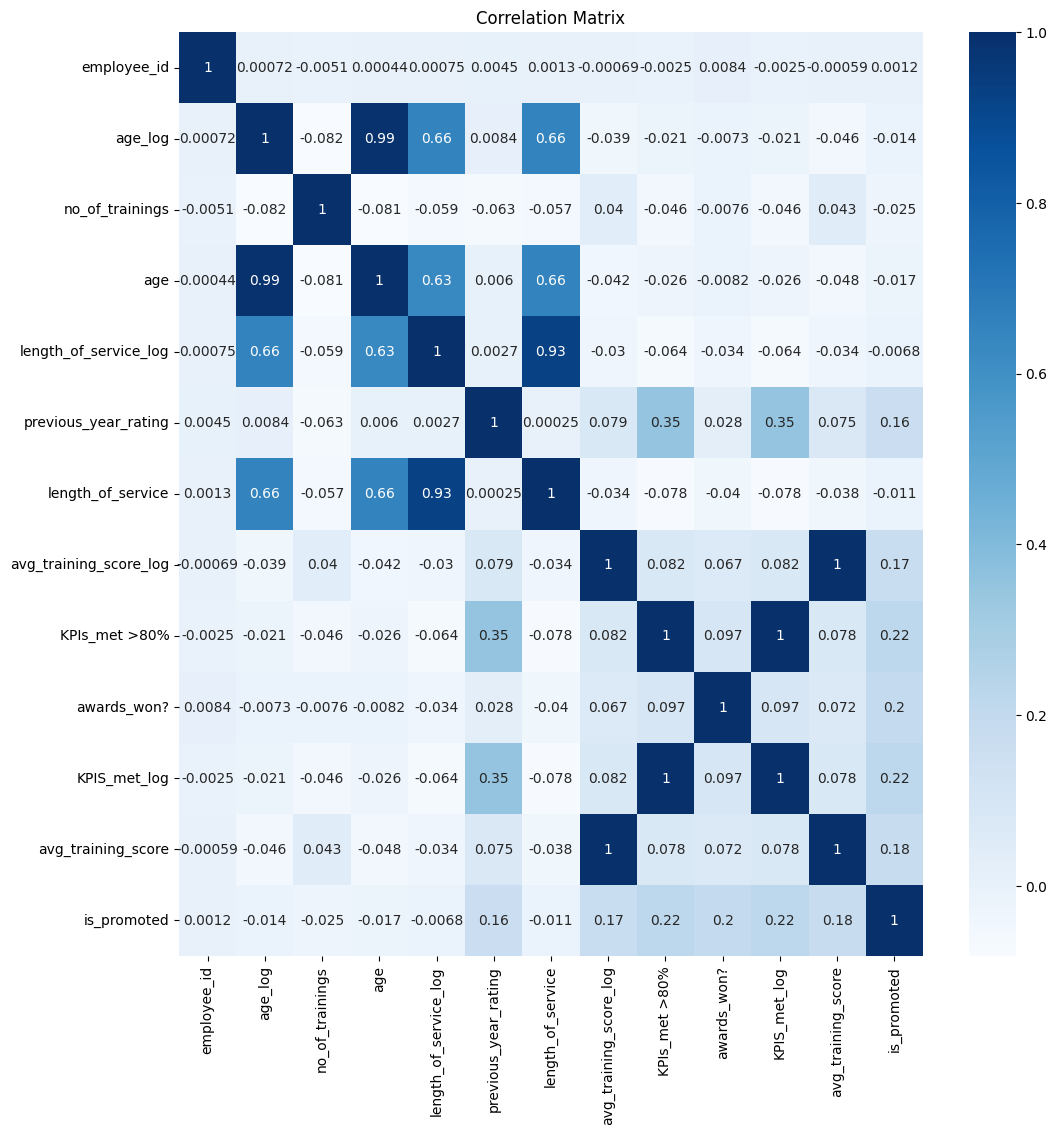

In [ ]:
# prompt: create a correlation matrix of features and make sure numbers fit well

# correlation matrix
corr = df_hr.corr()
# plot the correlation matrix
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()


### Data Wrangling

In [ ]:
df_hr.isna().sum()

employee_id                  0
department                   0
region                       0
education                 2409
gender                       0
recruitment_channel          0
age_log                      0
no_of_trainings              0
age                          0
length_of_service_log        0
previous_year_rating      4124
length_of_service            0
avg_training_score_log       0
KPIs_met >80%                0
awards_won?                  0
KPIS_met_log                 0
avg_training_score           0
is_promoted                  0
dtype: int64

In [ ]:
print(mean_rating)

3.339145677645539


In [ ]:
# for previous_year_rating and I'm going to do feature engineering and replace the na with the averages\

# Calculate the mean rating
mean_rating = df_hr['previous_year_rating'].mean()

# Replace missing values with the mean
df_hr['previous_year_rating'].fillna(mean_rating, inplace=True)

# Verify that missing values have been filled
print(df_hr.isnull().sum())

employee_id                  0
department                   0
region                       0
education                 2409
gender                       0
recruitment_channel          0
age_log                      0
no_of_trainings              0
age                          0
length_of_service_log        0
previous_year_rating         0
length_of_service            0
avg_training_score_log       0
KPIs_met >80%                0
awards_won?                  0
KPIS_met_log                 0
avg_training_score           0
is_promoted                  0
dtype: int64


In [ ]:
# now I want to just drop the missing education ones because I don't want to assume education because they varied across people...
# only dropping about 2000 records.
df_hr = df_hr.dropna()

# Verify that missing values have been filled
print(df_hr.isnull().sum())
df_hr.info()

employee_id               0
department                0
region                    0
education                 0
gender                    0
recruitment_channel       0
age_log                   0
no_of_trainings           0
age                       0
length_of_service_log     0
previous_year_rating      0
length_of_service         0
avg_training_score_log    0
KPIs_met >80%             0
awards_won?               0
KPIS_met_log              0
avg_training_score        0
is_promoted               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52399 entries, 0 to 54807
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   employee_id             52399 non-null  int64  
 1   department              52399 non-null  object 
 2   region                  52399 non-null  object 
 3   education               52399 non-null  object 
 4   gender                  52399 non-null  object 
 5 

Now I want to get dummy variables for the features written in categorical labels.. I also want to scale for safe measure.

In [ ]:
# get dummies
df_hr1 = pd.get_dummies(df_hr)
df_hr1.head()

,employee_id,age_log,no_of_trainings,age,length_of_service_log,previous_year_rating,length_of_service,avg_training_score_log,KPIs_met >80%,awards_won?,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,3.583519,1,35,2.197225,5.0,8,3.912023,1,0,...,0,0,0,0,1,1,0,0,0,1
1,65141,3.433987,1,30,1.609438,5.0,4,4.110874,0,0,...,0,0,1,0,0,0,1,1,0,0
2,7513,3.555348,1,34,2.079442,3.0,7,3.931826,0,0,...,0,0,1,0,0,0,1,0,0,1
3,2542,3.688879,2,39,2.397895,1.0,10,3.931826,0,0,...,0,0,1,0,0,0,1,1,0,0
4,48945,3.828641,1,45,1.098612,3.0,2,4.304065,0,0,...,0,0,1,0,0,0,1,1,0,0


Now I have 64 columns after conversion of dummy variables.

Let's scale because I was thinking of running a logistic regression.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Extract features (excluding "is_promoted") for scaling
features_to_scale = df_hr1.drop("is_promoted", axis=1).columns

# Standardize the selected features
scaler = StandardScaler()
df_hr1[features_to_scale] = scaler.fit_transform(df_hr1[features_to_scale])

df_hr1.head()

,employee_id,age_log,no_of_trainings,age,length_of_service_log,previous_year_rating,length_of_service,avg_training_score_log,KPIs_met >80%,awards_won?,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1.161767,0.106110,-0.417644,0.002595,0.740805,1.371938,0.483454,-1.164139,1.342641,-0.154006,...,-0.111374,-0.084558,-1.526811,-0.12491,1.584557,1.513667,-1.513667,-1.115895,-0.148729,1.166143
1,1.148624,-0.641587,-0.417644,-0.653667,-0.278416,1.371938,-0.451912,-0.182812,-0.744801,-0.154006,...,-0.111374,-0.084558,0.654960,-0.12491,-0.631091,-0.660647,0.660647,0.896141,-0.148729,-0.857528
2,-1.401493,-0.034751,-0.417644,-0.128657,0.536569,-0.277954,0.249613,-1.066413,-0.744801,-0.154006,...,-0.111374,-0.084558,0.654960,-0.12491,-0.631091,-0.660647,0.660647,-1.115895,-0.148729,1.166143
3,-1.621467,0.632940,1.212457,0.527604,1.088767,-1.927845,0.951137,-1.066413,-0.744801,-0.154006,...,-0.111374,-0.084558,0.654960,-0.12491,-0.631091,-0.660647,0.660647,0.896141,-0.148729,-0.857528
4,0.431929,1.331785,-0.417644,1.315118,-1.164186,-0.277954,-0.919595,0.770584,-0.744801,-0.154006,...,-0.111374,-0.084558,0.654960,-0.12491,-0.631091,-0.660647,0.660647,0.896141,-0.148729,-0.857528


### Modeling

In [ ]:
# using all features, dropping employee_id, of course, and original columns age, length of service, average training score, kpis met
# trying to predict is promoted
x = df_hr1.drop(columns=['is_promoted', 'employee_id', 'age', 'length_of_service','avg_training_score','KPIs_met >80%'])
y = df_hr1['is_promoted'].astype(int)

In [ ]:
num_features = x.shape[1]
print("Number of features:", num_features)

Number of features: 58


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (41919, 58)
Shape of X_test:  (10480, 58)
Shape of y_train:  (41919,)
Shape of y_test:  (10480,)


### OLS

In [ ]:
import statsmodels.api as sm
# Fit the OLS model
ols_model = sm.OLS(y_train, X_train).fit()

In [ ]:
# Make predictions
y_pred_ols = ols_model.predict(X_test)

In [ ]:
print(ols_model.summary())


                                 OLS Regression Results                                
Dep. Variable:            is_promoted   R-squared (uncentered):                   0.208
Model:                            OLS   Adj. R-squared (uncentered):              0.207
Method:                 Least Squares   F-statistic:                              207.2
Date:                Tue, 19 Dec 2023   Prob (F-statistic):                        0.00
Time:                        02:31:53   Log-Likelihood:                         -3726.0
No. Observations:               41919   AIC:                                      7558.
Df Residuals:                   41866   BIC:                                      8016.
Df Model:                          53                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_ols)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.06550773866253563


In [ ]:
print(y_test)
print(y_pred_ols)

53860    0
37020    0
10314    0
2537     0
23583    0
        ..
8044     0
29855    0
49047    0
5129     0
32112    0
Name: is_promoted, Length: 10480, dtype: int64
53860   -0.051751
37020   -0.047647
10314   -0.186305
2537     0.097871
23583   -0.045734
           ...   
8044     0.075601
29855    0.114746
49047    0.146043
5129    -0.160554
32112   -0.031508
Length: 10480, dtype: float64


In [ ]:
y_pred_ols_promote = (y_pred_ols > 0.5).astype(int)
y_test_binary = (y_test > 0.5).astype(int)

In [ ]:
#f1 score
from sklearn.metrics import f1_score

f1_ols = f1_score(y_test_binary, y_pred_ols_promote)

print(f'F1 Score for OLS Model: {f1_ols}')

F1 Score for OLS Model: 0.17494600431965443


True Negatives: 9635
False Positives: 0
False Negatives: 764
True Positives: 81


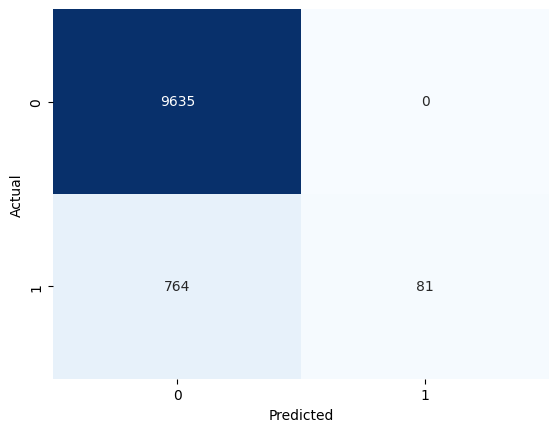

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix_ols = confusion_matrix(y_test_binary, y_pred_ols_promote)

# Extract true positives, false positives, true negatives, and false negatives from the confusion matrix
tn, fp, fn, tp = conf_matrix_ols.ravel()

# Print the values
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

# Create a heatmap to visualize the confusion matrix
sns.heatmap(conf_matrix_ols, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Let's calculate the sensitivity and specificity rate

In [ ]:
# calculate TPR and TNR
# sensitivity rate (TPR)
print("TPR", 81/(81+764))

# specificity rate (TNR)
print("TNR", 9635/(9635+0))

TPR 0.09585798816568047
TNR 1.0


okay performance from OLS

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=21)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=21)

In [ ]:
rf_pred = rf_model.predict(X_test)

In [ ]:
print(rf_pred)

[0 0 0 ... 0 0 0]


In [ ]:
print(y_test)

53860    0
37020    0
10314    0
2537     0
23583    0
        ..
8044     0
29855    0
49047    0
5129     0
32112    0
Name: is_promoted, Length: 10480, dtype: int64


In [ ]:
from sklearn.metrics import f1_score

# Assuming y_test and rf_pred are your true labels and predicted labels
# Replace y_test and rf_pred with your actual true labels and predicted labels

# Calculate the F1 score with pos_label set to 0
f1_rf = f1_score(y_test, rf_pred)

print("F1 Score for Random Forest Model:", f1_rf)

F1 Score for Random Forest Model: 0.4245038826574634


True Negatives: 9567
False Positives: 68
False Negatives: 599
True Positives: 246


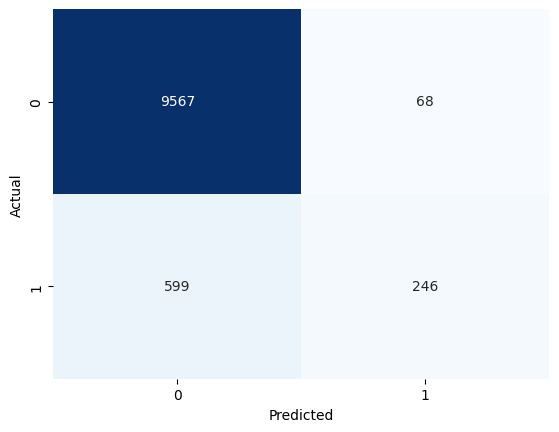

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, rf_pred)

# Extract true positives, false positives, true negatives, and false negatives from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Print the values
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

# Create a heatmap to visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# calculate TPR and TNR
# sensitivity rate (TPR)
print("TPR", 246/(246+599))

# specificity rate (TNR)
print("TNR", 9567/(9567+68))

TPR 0.2911242603550296
TNR 0.9929423975090814


definitely better than ols but not great.

### Logistic Method

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(solver='liblinear', random_state=18)
logistic_model.fit(X_train, y_train)


LogisticRegression(random_state=18, solver='liblinear')

In [ ]:
# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score

# Calculate the F1 score
f1 = f1_score(y_test, y_pred_logistic)

# Print the F1 score
print("F1 Score:", f1)

F1 Score: 0.39644444444444443


True Negatives: 9578
False Positives: 57
False Negatives: 622
True Positives: 223


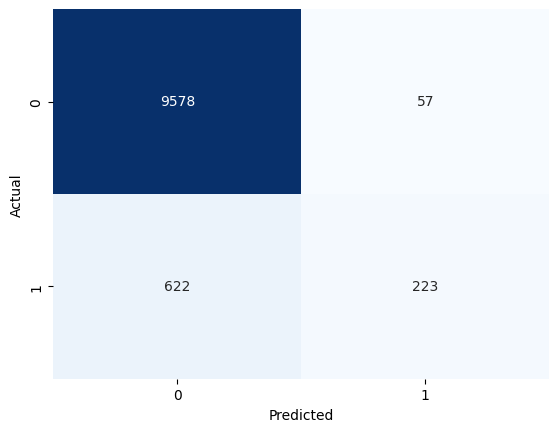

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_logistic)

# Extract true positives, false positives, true negatives, and false negatives from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Print the values
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

# Create a heatmap to visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# calculate TPR and TNR
# sensitivity rate (TPR)
print("TPR", 223/(228+622))

# specificity rate (TNR)
print("TNR", 9578/(9578+57))

TPR 0.26235294117647057
TNR 0.9940840685002594


### ADA Boost on Random Forest

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Create a weak learner (base model), for example, a decision tree
base_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=20)

# Create an AdaBoost classifier with the random forest
ada_rf_model = AdaBoostClassifier(base_model, n_estimators=25, random_state=20)


In [ ]:
# Train the AdaBoost model on the training set
ada_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ada = ada_rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score

# Calculate the F1 score
f1 = f1_score(y_test, y_pred_ada)

# Print the F1 score
print("F1 Score:", f1)

F1 Score: 0.47288135593220343


True Negatives: 9579
False Positives: 56
False Negatives: 566
True Positives: 279


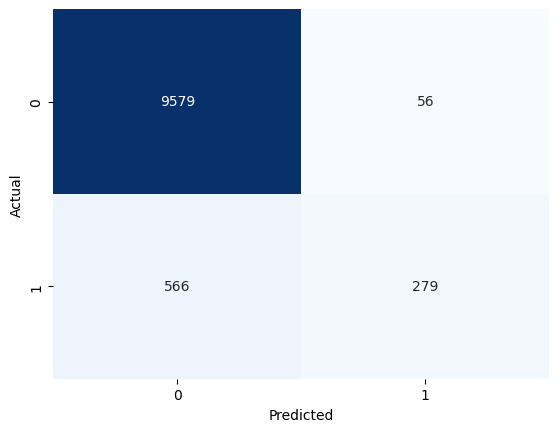

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_ada)

# Extract true positives, false positives, true negatives, and false negatives from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Print the values
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

# Create a heatmap to visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# calculate TPR and TNR
# sensitivity rate (TPR)
print("TPR", 279/(279+566))

# specificity rate (TNR)
print("TNR", 9579/(9579+56))

TPR 0.3301775147928994
TNR 0.9941878567721848


slightly better than rf

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 15, min_samples_split = 20, random_state = 24)
tree.fit(X_train, y_train)
dt_pred = tree.predict(X_test)

In [ ]:
# don't need to run this everytime, but i performed a grid search
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10, 15],  # You can adjust the range based on your dataset
    'min_samples_split': [2, 5, 10, 20]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(tree, param_grid, scoring='f1', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Use the best parameters to create the final model
final_model = DecisionTreeClassifier(**best_params)
print(best_params)
# Fit the final model to the training data
final_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = final_model.predict(X_test)


{'max_depth': 15, 'min_samples_split': 10}


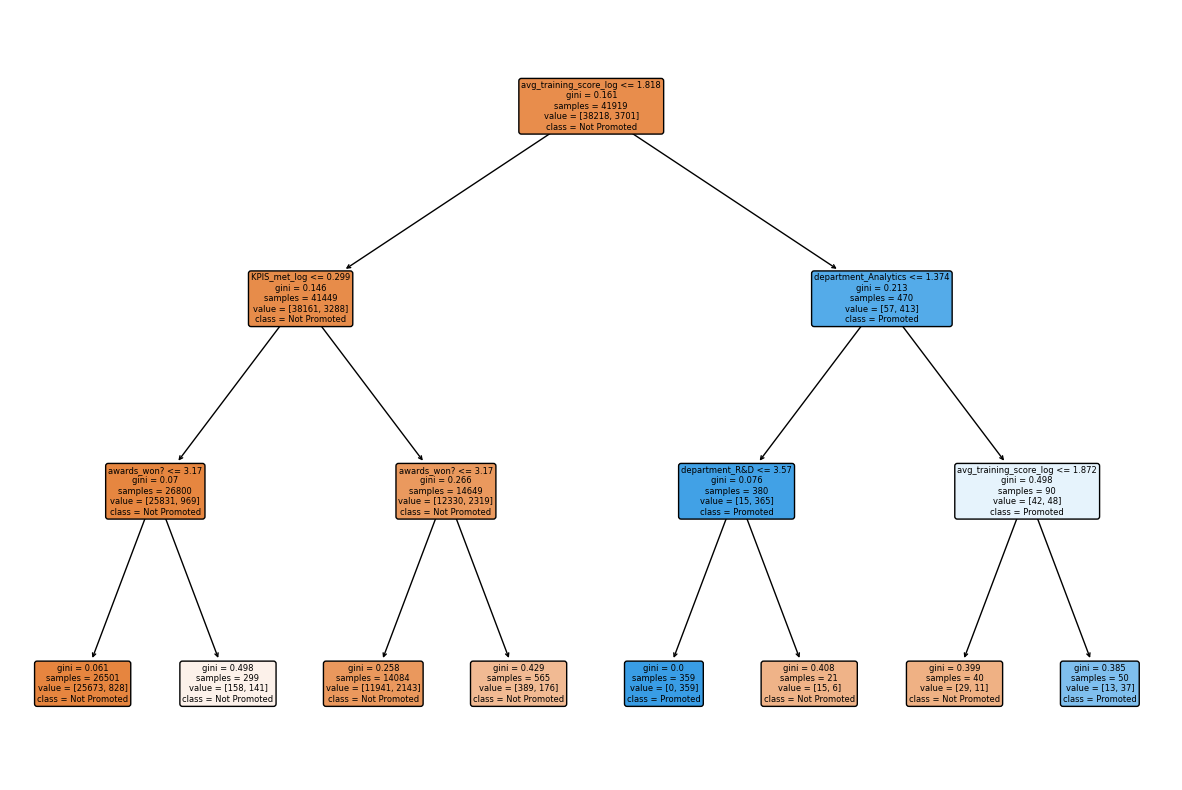

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming you have already trained a DecisionTreeClassifier named 'tree'
max_depth_to_show = 3  # Set the maximum depth you want to show

tree = DecisionTreeClassifier(max_depth=max_depth_to_show, min_samples_split=20, random_state=24)
tree.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(tree, feature_names=X_train.columns, class_names=['Not Promoted', 'Promoted'], filled=True, rounded=True)
plt.show()

In [ ]:
# Calculate the F1 score
f1 = f1_score(y_test, dt_pred)

# Print the F1 score
print("F1 Score:", f1)

F1 Score: 0.48309178743961356


True Negatives: 9538
False Positives: 97
False Negatives: 545
True Positives: 300


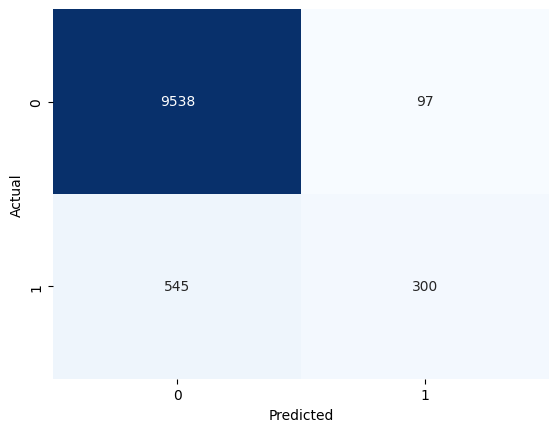

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Assuming y_true contains the true labels and y_pred contains the predicted labels
# Replace y_true and y_pred with your actual true and predicted labels

# Calculate the confusion matrix
cm = confusion_matrix(y_test, dt_pred)

# Extract true positives, false positives, true negatives, and false negatives from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Print the values
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

# Create a heatmap to visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# calculate TPR and TNR
# sensitivity rate (TPR)
print("TPR", 300/(300+545))

# specificity rate (TNR)
print("TNR", 9538/(9538+97))

TPR 0.35502958579881655
TNR 0.9899325376232486


i think this is the best one and most simple...

### ADA boost on tree

In [ ]:
tree_base_model = DecisionTreeClassifier(max_depth=5)

# Create the AdaBoost classifier
ada_dt_model = AdaBoostClassifier(tree_base_model, random_state=21)

# Define the hyperparameters to tune
param_grid_ada = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5]
}

# Create the GridSearchCV object
grid_search_ada = GridSearchCV(ada_dt_model, param_grid_ada, scoring='f1', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search_ada.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params_ada = grid_search_ada.best_params_
print(best_params_ada)
# Use the best parameters to create the final AdaBoost model
final_ada_model = AdaBoostClassifier(base_model, **best_params_ada, random_state=42)

# Fit the final AdaBoost model to the training data
final_ada_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ada_dt = final_ada_model.predict(X_test)

{'learning_rate': 0.5, 'n_estimators': 50}


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Create a weak learner (base model), for example, a decision tree
tree_base_model = DecisionTreeClassifier(max_depth=5, random_state=21)

# Create the AdaBoost classifier
ada_dt2_model = AdaBoostClassifier(tree_base_model,learning_rate = 0.5, n_estimators = 50, random_state=42)

In [ ]:
# Train the AdaBoost model on the training set
ada_dt2_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ada2 = ada_dt2_model.predict(X_test)

In [ ]:
# Calculate the F1 score
f1 = f1_score(y_test, y_pred_ada2)

# Print the F1 score
print("F1 Score:", f1)

F1 Score: 0.4887459807073955


True Negatives: 9540
False Positives: 95
False Negatives: 541
True Positives: 304


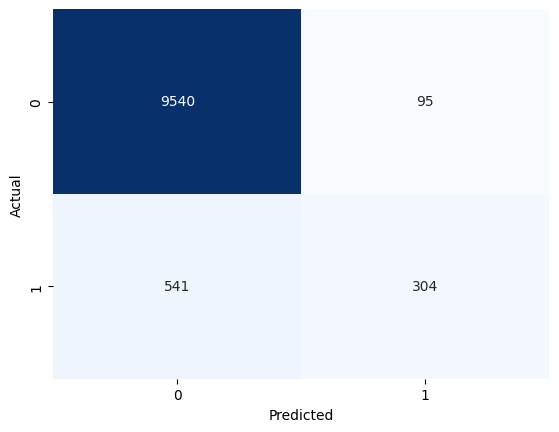

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Assuming y_true contains the true labels and y_pred contains the predicted labels
# Replace y_true and y_pred with your actual true and predicted labels

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_ada2)

# Extract true positives, false positives, true negatives, and false negatives from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Print the values
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

# Create a heatmap to visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# calculate TPR and TNR
# sensitivity rate (TPR)
print("TPR", 304/(304+541))

# specificity rate (TNR)
print("TNR", 9540/(9540+95))

TPR 0.35976331360946745
TNR 0.9901401141670991


### I'm choosing my decision tree model to predict my test data that was attached in a separate file.

In [ ]:
df_hr1.head()

,employee_id,age_log,no_of_trainings,age,length_of_service_log,previous_year_rating,length_of_service,avg_training_score_log,KPIs_met >80%,awards_won?,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1.161767,0.106110,-0.417644,0.002595,0.740805,1.371938,0.483454,-1.164139,1.342641,-0.154006,...,-0.111374,-0.084558,-1.526811,-0.12491,1.584557,1.513667,-1.513667,-1.115895,-0.148729,1.166143
1,1.148624,-0.641587,-0.417644,-0.653667,-0.278416,1.371938,-0.451912,-0.182812,-0.744801,-0.154006,...,-0.111374,-0.084558,0.654960,-0.12491,-0.631091,-0.660647,0.660647,0.896141,-0.148729,-0.857528
2,-1.401493,-0.034751,-0.417644,-0.128657,0.536569,-0.277954,0.249613,-1.066413,-0.744801,-0.154006,...,-0.111374,-0.084558,0.654960,-0.12491,-0.631091,-0.660647,0.660647,-1.115895,-0.148729,1.166143
3,-1.621467,0.632940,1.212457,0.527604,1.088767,-1.927845,0.951137,-1.066413,-0.744801,-0.154006,...,-0.111374,-0.084558,0.654960,-0.12491,-0.631091,-0.660647,0.660647,0.896141,-0.148729,-0.857528
4,0.431929,1.331785,-0.417644,1.315118,-1.164186,-0.277954,-0.919595,0.770584,-0.744801,-0.154006,...,-0.111374,-0.084558,0.654960,-0.12491,-0.631091,-0.660647,0.660647,0.896141,-0.148729,-0.857528


Now let's make predictions into my test dataset..

In [ ]:
df_submission= pd.read_csv("/content/test_2umaH9m.csv")

need to change the columns from submission test dataset in order to predict...

In [ ]:
# take log
age_log = np.log1p(df_submission['age'])
service_log = np.log1p(df_submission['length_of_service'])
score_log = np.log1p(df_submission['avg_training_score'])
KPIS_met_log = np.log1p(df_submission['KPIs_met >80%'])

df_submission.insert(6, 'age_log', age_log)
df_submission.insert(9, 'length_of_service_log', service_log)
df_submission.insert(12, 'avg_training_score_log', score_log)
df_submission.insert(15, 'KPIS_met_log', KPIS_met_log)

df_submission.head()

,employee_id,department,region,education,gender,recruitment_channel,age_log,no_of_trainings,age,length_of_service_log,previous_year_rating,length_of_service,avg_training_score_log,KPIs_met >80%,awards_won?,KPIS_met_log,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,3.218876,1,24,0.693147,NaN,1,4.356709,1,0,0.693147,77
1,74430,HR,region_4,Bachelor's,f,other,3.465736,1,31,1.791759,3.0,5,3.951244,0,0,0.000000,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,3.465736,1,31,1.609438,1.0,4,3.871201,0,0,0.000000,47
3,38562,Procurement,region_2,Bachelor's,f,other,3.465736,3,31,2.302585,2.0,9,4.189655,0,0,0.000000,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,3.433987,1,30,2.079442,4.0,7,4.127134,0,0,0.000000,61


In [ ]:
df_submission.isna().sum()

employee_id                  0
department                   0
region                       0
education                 1034
gender                       0
recruitment_channel          0
age_log                      0
no_of_trainings              0
age                          0
length_of_service_log        0
previous_year_rating      1812
length_of_service            0
avg_training_score_log       0
KPIs_met >80%                0
awards_won?                  0
KPIS_met_log                 0
avg_training_score           0
dtype: int64

In [ ]:
# for previous_year_rating and I'm going to do feature engineering and replace the na with the averages\

# Calculate the mean rating
mean_rating = df_submission['previous_year_rating'].mean()

# Replace missing values with the mean
df_submission['previous_year_rating'].fillna(mean_rating, inplace=True)

# Verify that missing values have been filled
print(df_submission.isnull().sum())

employee_id                  0
department                   0
region                       0
education                 1034
gender                       0
recruitment_channel          0
age_log                      0
no_of_trainings              0
age                          0
length_of_service_log        0
previous_year_rating         0
length_of_service            0
avg_training_score_log       0
KPIs_met >80%                0
awards_won?                  0
KPIS_met_log                 0
avg_training_score           0
dtype: int64


In [ ]:
# now I want to just drop the missing education ones because I don't want to assume education because they varied across people...
# only dropping about 1000 records.
df_submission = df_submission.dropna()

# Verify that missing values have been filled
print(df_submission.isnull().sum())

employee_id               0
department                0
region                    0
education                 0
gender                    0
recruitment_channel       0
age_log                   0
no_of_trainings           0
age                       0
length_of_service_log     0
previous_year_rating      0
length_of_service         0
avg_training_score_log    0
KPIs_met >80%             0
awards_won?               0
KPIS_met_log              0
avg_training_score        0
dtype: int64


In [ ]:
# get dummies
df_submission1 = pd.get_dummies(df_submission)
df_submission1.head()

,employee_id,age_log,no_of_trainings,age,length_of_service_log,previous_year_rating,length_of_service,avg_training_score_log,KPIs_met >80%,awards_won?,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,8724,3.218876,1,24,0.693147,3.339146,1,4.356709,1,0,...,0,0,1,0,0,0,1,0,0,1
1,74430,3.465736,1,31,1.791759,3.000000,5,3.951244,0,0,...,0,0,1,0,0,1,0,1,0,0
2,72255,3.465736,1,31,1.609438,1.000000,4,3.871201,0,0,...,0,0,1,0,0,0,1,1,0,0
3,38562,3.465736,3,31,2.302585,2.000000,9,4.189655,0,0,...,0,0,1,0,0,1,0,1,0,0
4,64486,3.433987,1,30,2.079442,4.000000,7,4.127134,0,0,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the selected features
scaler = StandardScaler()
df_submission1[features_to_scale] = scaler.fit_transform(df_submission1[features_to_scale])

df_submission1.head()

,employee_id,age_log,no_of_trainings,age,length_of_service_log,previous_year_rating,length_of_service,avg_training_score_log,KPIs_met >80%,awards_won?,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,-1.338045,-1.707578,-0.425369,-1.433412,-1.862557,-0.007120,-1.155545,1.037568,1.324891,-0.154117,...,-0.109487,-0.084445,0.66447,-0.130142,-0.638532,-0.653141,0.653141,-1.120401,-0.142675,1.166856
1,1.563332,-0.478235,-0.425369,-0.518541,0.049446,-0.286173,-0.208020,-0.954064,-0.754779,-0.154117,...,-0.109487,-0.084445,0.66447,-0.130142,-0.638532,1.531063,-1.531063,0.892538,-0.142675,-0.857004
2,1.467291,-0.478235,-0.425369,-0.518541,-0.267863,-1.931797,-0.444901,-1.347231,-0.754779,-0.154117,...,-0.109487,-0.084445,0.66447,-0.130142,-0.638532,-0.653141,0.653141,0.892538,-0.142675,-0.857004
3,-0.020490,-0.478235,2.879850,-0.518541,0.938477,-1.108985,0.739505,0.217004,-0.754779,-0.154117,...,-0.109487,-0.084445,0.66447,-0.130142,-0.638532,1.531063,-1.531063,0.892538,-0.142675,-0.857004
4,1.124236,-0.636341,-0.425369,-0.649237,0.550123,0.536639,0.265742,-0.090094,-0.754779,-0.154117,...,-0.109487,-0.084445,0.66447,-0.130142,-0.638532,-0.653141,0.653141,-1.120401,-0.142675,1.166856


make predictions

In [ ]:
x_submit = df_submission1.drop(columns=['employee_id', 'age', 'length_of_service','avg_training_score','KPIs_met >80%'])

submission_pred = tree.predict(x_submit)

finally, insert predictions into the test submission df

In [ ]:
# insert predictions into dataframe
df_submission['is_promoted'] = submission_pred

# Display the updated dataframe
df_submission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22456 entries, 0 to 23489
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   employee_id             22456 non-null  int64  
 1   department              22456 non-null  object 
 2   region                  22456 non-null  object 
 3   education               22456 non-null  object 
 4   gender                  22456 non-null  object 
 5   recruitment_channel     22456 non-null  object 
 6   age_log                 22456 non-null  float64
 7   no_of_trainings         22456 non-null  int64  
 8   age                     22456 non-null  int64  
 9   length_of_service_log   22456 non-null  float64
 10  previous_year_rating    22456 non-null  float64
 11  length_of_service       22456 non-null  int64  
 12  avg_training_score_log  22456 non-null  float64
 13  KPIs_met >80%           22456 non-null  int64  
 14  awards_won?             22456 non-null

In [ ]:
# download
df_submission.to_csv('submissionyjlee.csv', index=False)

### Assess promotion rate by gender - Algorithmic Bias

In [ ]:
promotion_rate_by_gender = df_submission.groupby('gender')['is_promoted'].mean()

# Display the promotion rate by gender
print(promotion_rate_by_gender)


gender
f    0.009680
m    0.009021
Name: is_promoted, dtype: float64
